In [1]:
#Bibliotecas necessárias
import pandas as pd
import math
from pandas_datareader import data, wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
sns.set_style('white')
sns.despine(top=True, right=True)

<Figure size 432x288 with 0 Axes>

<h1>Análise exploratoria de dados</h1>

In [2]:
inicio = datetime.datetime(2020, 1, 1)
fim = datetime.datetime(2020, 12, 1)
tickers = ['BANCO DO BRASIL', 'PETROBRÁS', 'GOL', 'JBS', 'MAGAZINE LUIZA', 'COGNA EDUCAÇÃO']
BANCO_DO_BRASIL = data.DataReader('BBAS3.SA', "yahoo", inicio, fim)
PETROBRAS = data.DataReader('PETR4.SA', 'yahoo', inicio, fim)
GOL = data.DataReader('GOLL4.SA', 'yahoo', inicio, fim)
JBS = data.DataReader('JBSS3.SA', 'yahoo', inicio, fim)
MAGAZINE_LUIZA = data.DataReader('MGLU3.SA', 'yahoo', inicio, fim)
COGNA_EDUCACAO = data.DataReader('COGN3.SA','yahoo', inicio, fim)

ativos = pd.concat([BANCO_DO_BRASIL, PETROBRAS, GOL, JBS, MAGAZINE_LUIZA, COGNA_EDUCACAO], axis=1, keys=tickers)
ativos.columns.names = ['Nome_ativo','Acontecimento']
ativos.head()

Nome_ativo    BANCO DO BRASIL                                               \
Acontecimento            High        Low       Open      Close      Volume   
Date                                                                         
2020-01-02          53.970001  53.169998  53.349998  53.799999  13159900.0   
2020-01-03          53.910000  52.849998  53.099998  53.709999   9465400.0   
2020-01-06          53.400002  52.450001  53.400002  53.000000   9999900.0   
2020-01-07          53.029999  52.290001  53.000000  52.599998  10638500.0   
2020-01-08          52.990002  52.040001  52.759998  52.119999  21468600.0   

Nome_ativo                PETROBRÁS                                   ...  \
Acontecimento  Adj Close       High        Low       Open      Close  ...   
Date                                                                  ...   
2020-01-02     46.053089  30.700001  30.309999  30.510000  30.700001  ...   
2020-01-03     45.976048  31.240000  30.450001  30.879999  30.450001  ...   
2020-01-06     45.368275  30.940001  29.950001  30.430000  30.809999  ...   
2020-01-07     45.025883  30.879999  30.469999  30.820000  30.690001  ...   
2020-01-08     44.615002  30.770000  30.240000  30.690001  30.500000  ...   

Nome_ativo    MAGAZINE LUIZA                                 COGNA EDUCAÇÃO  \
Acontecimento           Open    Close      Volume  Adj Close           High   
Date                                                                          
2020-01-02            12.075  12.3325  29600800.0  12.029735          12.20   
2020-01-03            12.125  12.2225  26737600.0  11.922436          12.37   
2020-01-06            12.100  12.2325  27359200.0  11.932189          12.07   
2020-01-07            12.235  12.1975  26818800.0  11.898048          12.21   
2020-01-08            12.155  12.5725  40007200.0  12.263843          12.27   

Nome_ativo                                              
Acontecimento    Low   Open  Close    Volume Adj Close  
Date                                                    
2020-01-02     11.46  11.55  12.20  12730400     12.20  
2020-01-03     11.82  11.87  12.15  12593300     12.15  
2020-01-06     11.70  12.00  11.99   8944500     11.99  
2020-01-07     11.75  11.99  12.08   7579200     12.08  
2020-01-08     11.90  12.18  12.00   7866300     12.00  

[5 rows x 36 columns]

<h2>1. Análise dos preços de cada ativo financeiro</h2>

<p>Os preços numa economia de mercado estão sempre num movimento de sobe e desce, obedecendo a lei da oferta e demanda. No mercado financeiro isso não é diferente, o preço dos ativos estão sempre subindo e descendo, obedecendo a lei fundamental do mercado.</p>

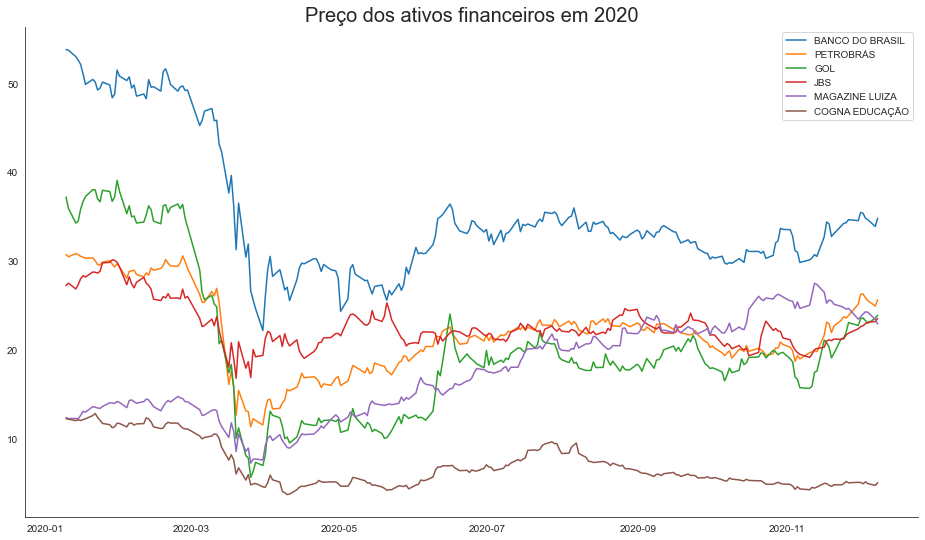

In [3]:
for i in tickers:
  ativos[i]['Close'].plot(figsize=(10,6),legend=True, label=i)
  ax = plt.title('Preço dos ativos financeiros em 2020', fontsize=20,)
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  sns.set_style('white')
ax.figure.set_size_inches(16, 10)

<p>Podemos observar que os preços caíram na mesma época do ano. O que será que aconteceu no início de março? Se formos lembrar, foi a época em que iniciaram os isolamentos sociais, os comércios fecharam, os números de mortes já começava a preocupar, e o mercado começou a tombar. As expectativas sobre a economia não eram muito boas no mundo inteiro, então ações começaram a se desvalorizar devido essa incerteza gerada pelo início da crise sanitária. Até aquele ponto, a sociedade e o mercado possuíam poucas informações sobre o que aconteceria nos próximos meses. A resposta do mercado foi no sentido das expectativas: para baixo!

Estatísticas descritivas dos fechamentos</p>

In [4]:
print(f'Fechamento mínimo: {ativos.xs(key="Close", axis=1, level="Acontecimento").min()}\n\nFechamento máximo: {ativos.xs(key="Close", axis=1, level="Acontecimento").max()}\n\nFechamendo médio:  {ativos.xs(key="Close", axis=1, level="Acontecimento").mean()}\n\nDesvio padrão:  {ativos.xs(key="Close", axis=1, level="Acontecimento").std()}')


Fechamento mínimo: Nome_ativo
BANCO DO BRASIL    22.129999
PETROBRÁS          11.290000
GOL                 5.600000
JBS                16.750000
MAGAZINE LUIZA      7.202500
COGNA EDUCAÇÃO      3.660000
dtype: float64

Fechamento máximo: Nome_ativo
BANCO DO BRASIL    53.799999
PETROBRÁS          30.809999
GOL                39.049999
JBS                30.090000
MAGAZINE LUIZA     27.450001
COGNA EDUCAÇÃO     12.790000
dtype: float64

Fechamendo médio:  Nome_ativo
BANCO DO BRASIL    35.168952
PETROBRÁS          21.869913
GOL                20.151004
JBS                22.672052
MAGAZINE LUIZA     17.537620
COGNA EDUCAÇÃO      6.964585
dtype: float64

Desvio padrão:  Nome_ativo
BANCO DO BRASIL    7.589455
PETROBRÁS          4.521559
GOL                8.102718
JBS                2.568915
MAGAZINE LUIZA     5.243339
COGNA EDUCAÇÃO     2.552072
dtype: float64


<h2>Volatilidade</h2>

<p>A volatilidade é uma variável que representa a frequência e intensidade oscilações no preço de um ativo num determinado período de tempo. Quanto maior a volatilidade, maior a variação do preço do ativo ativo. Mas a volatilidade vai além disso. Ela mostra se relaciona também com o próprio mercado. Os índices do mercado financeiro podem ser influenciados por uma série de fatores externos, como o cenário político, o otimismo e pessimismo dos investidores, ou uma pandemia.

Veremos agora, a volatilidade dos ativos financeiros que estamos analisando</p>

In [5]:
volatilidade = pd.DataFrame()
for tick in tickers:
  volatilidade[tick + '(volatilidade)'] = ativos[tick]['Close'].pct_change()
volatilidade.head()

,BANCO DO BRASIL(volatilidade),PETROBRÁS(volatilidade),GOL(volatilidade),JBS(volatilidade),MAGAZINE LUIZA(volatilidade),COGNA EDUCAÇÃO(volatilidade)
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.001673,-0.008143,-0.034167,0.009926,-0.008920,-0.004098
2020-01-06,-0.013219,0.011823,-0.045961,-0.023662,0.000818,-0.013169
2020-01-07,-0.007547,-0.003895,0.005839,0.017897,-0.002861,0.007506
2020-01-08,-0.009125,-0.006191,0.039478,0.024542,0.030744,-0.006623


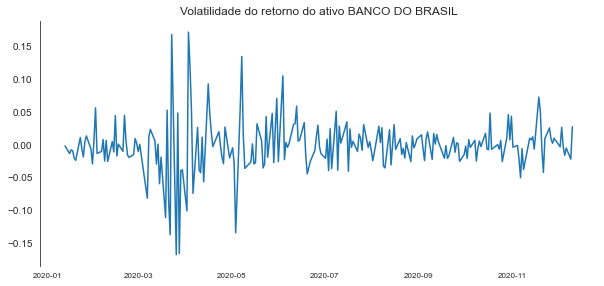

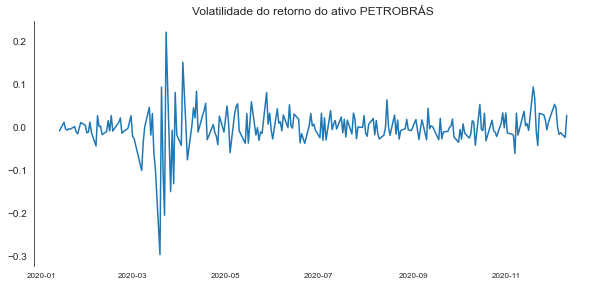

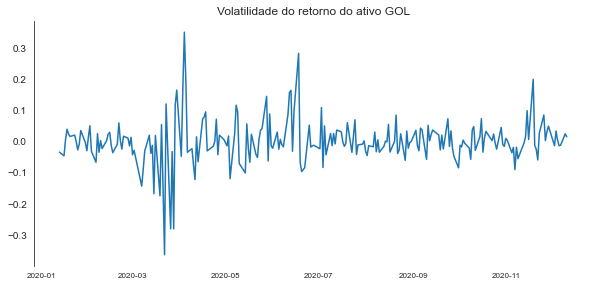

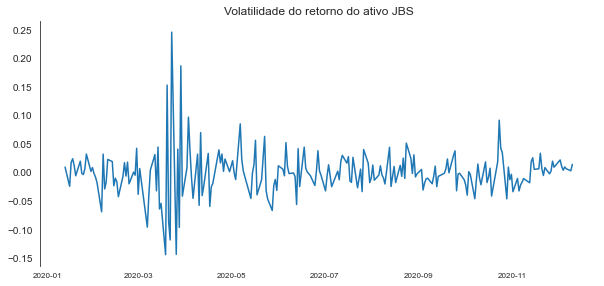

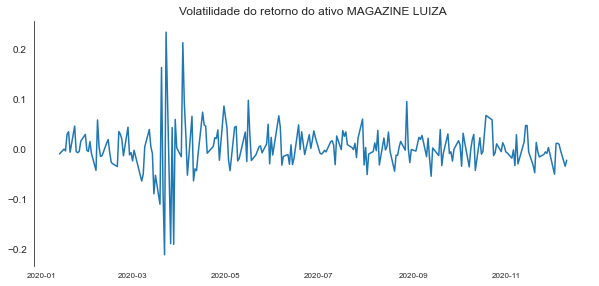

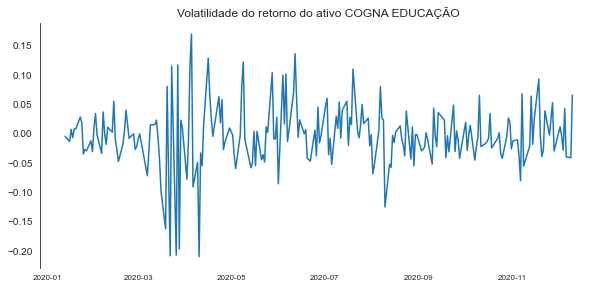

In [6]:
for i in volatilidade.columns:
  plt.figure()
  volatilidade[i].plot(figsize=(10,5))
  plt.title(f'Volatilidade do retorno do ativo {str(i).strip("(volatilidade)")}')
  sns.despine(bottom=True)
  plt.xticks(fontsize=8, rotation=360)
  plt.xlabel('')

<p>Como podemos observar, entre março e maio, as variações do preço do ativo foram muito mais intensas, e isso é representado pelas oscilações nos gráficos. O que explica essa oscilação nessa intensidade? A explicação mais plausível é que esse foi o período onde começaram os isolamentos sociais, e as quarentenas. Seguido do fechamento de comércios e muitos postos de trabalho

Descobrir o que aconteceu no dia da alta e baixa dos ativos</p>

In [7]:
print(f'Dias de baixa volatilidade:\n\n{volatilidade.idxmin()}\n\n\nDias de alta volatilidade\n\n{volatilidade.idxmax()}')

Dias de baixa volatilidade:

BANCO DO BRASIL(volatilidade)   2020-03-16
PETROBRÁS(volatilidade)         2020-03-09
GOL(volatilidade)               2020-03-12
JBS(volatilidade)               2020-03-09
MAGAZINE LUIZA(volatilidade)    2020-03-12
COGNA EDUCAÇÃO(volatilidade)    2020-03-31
dtype: datetime64[ns]


Dias de alta volatilidade

BANCO DO BRASIL(volatilidade)   2020-03-24
PETROBRÁS(volatilidade)         2020-03-13
GOL(volatilidade)               2020-03-25
JBS(volatilidade)               2020-03-13
MAGAZINE LUIZA(volatilidade)    2020-03-13
COGNA EDUCAÇÃO(volatilidade)    2020-03-26
dtype: datetime64[ns]


<p>Observa-se que o dia com menor volatilidade for 16/03 e o dia com maior volatilidade foi 13/03. Foi justamente na época onde começamos a apertar o isolamento social, por volta do meado de março. O leitor ainda pode pesquisar no Google sobre notícias que aconteceram nesse dia.</p>

<h2>Médias móveis<h2>

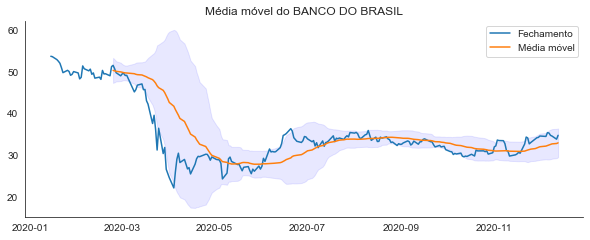

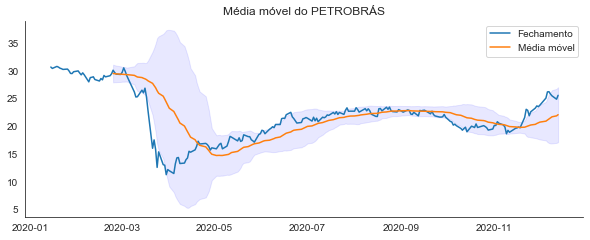

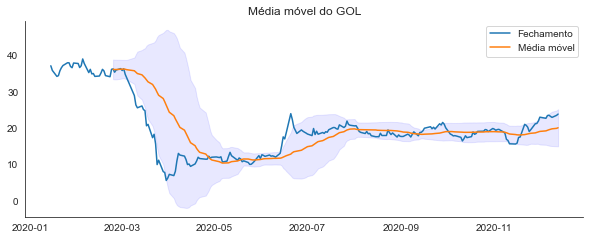

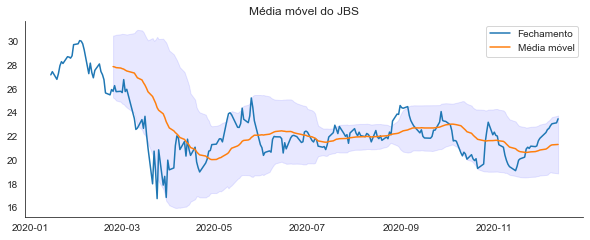

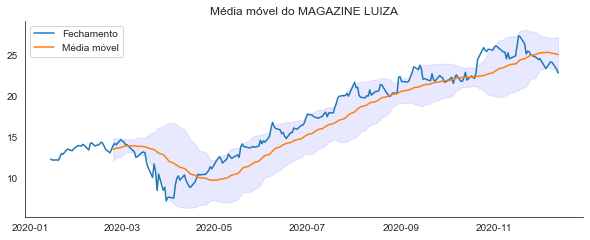

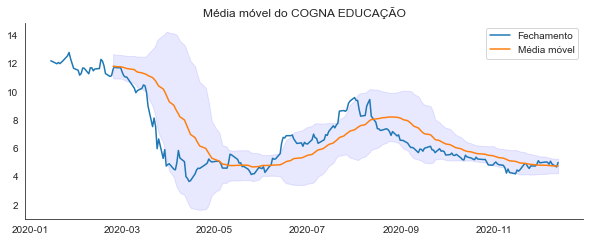

In [8]:
for i in ativos.columns.levels[0]:
  ativos_2020_close = ativos[f'{i}']['Close'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_open = ativos[f'{i}']['Open'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_high = ativos[f'{i}']['High'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_low = ativos[f'{i}']['Low'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_volume = ativos[f'{i}']['Volume'][ativos[f'{i}'].index.year == 2020]

  media = ativos_2020_close.rolling(30).mean()
  std = ativos_2020_close.rolling(30).std()

  plt.figure(figsize=(10,4))
  ativos_2020_close.plot(label='Fechamento')
  media.plot(label='Média móvel')
  plt.fill_between(ativos_2020_close.index, media - 2 * std, media + 2 * std, color='b', alpha=0.09)#Dois desvios padroes da média
  plt.legend()
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  plt.title(f'Média móvel do {f"{i}"}')

<p>As oscilações maiores (em laranja) nos mostram os ciclos que se passaram no mercado durante esse ano, sendo no período de março a maior queda. De fato, a doença, o isolamento social (que foi necessário para conter o avanço da pandemia), as incertezas sobre o ano, as notícias sobre mortes e casos avançando cada vez mais, e todo o caos influenciaram as expectativas no mercado financeiro. Podemos observar aqui, que a Magazine Luiza conseguiu decolar em meio a uma crise mundial. Quando analisarmos as correlações, ela terá correlação muito baixa/negativa com os demais ativos.</p>

<h2>Correlação entre a volatilidade</h2>

In [9]:
volatilidade.corr()

,BANCO DO BRASIL(volatilidade),PETROBRÁS(volatilidade),GOL(volatilidade),JBS(volatilidade),MAGAZINE LUIZA(volatilidade),COGNA EDUCAÇÃO(volatilidade)
BANCO DO BRASIL(volatilidade),1.000000,0.749864,0.712785,0.474059,0.623627,0.658511
PETROBRÁS(volatilidade),0.749864,1.000000,0.657529,0.610937,0.611492,0.569295
GOL(volatilidade),0.712785,0.657529,1.000000,0.405666,0.557474,0.662101
JBS(volatilidade),0.474059,0.610937,0.405666,1.000000,0.638434,0.406236
MAGAZINE LUIZA(volatilidade),0.623627,0.611492,0.557474,0.638434,1.000000,0.554091
COGNA EDUCAÇÃO(volatilidade),0.658511,0.569295,0.662101,0.406236,0.554091,1.000000


<p>Temos a maior correlação da volatilidade sendo entre BANCO DO BRASIL e PETROBRÁS, com 75,08% de correlação

Ainda conseguimos visualizar, de forma que a informação seja assimilada com mais facilidade. Faremos um mapa de calor para a correlação entre a volatilidade dos ativos financeiros.</p>

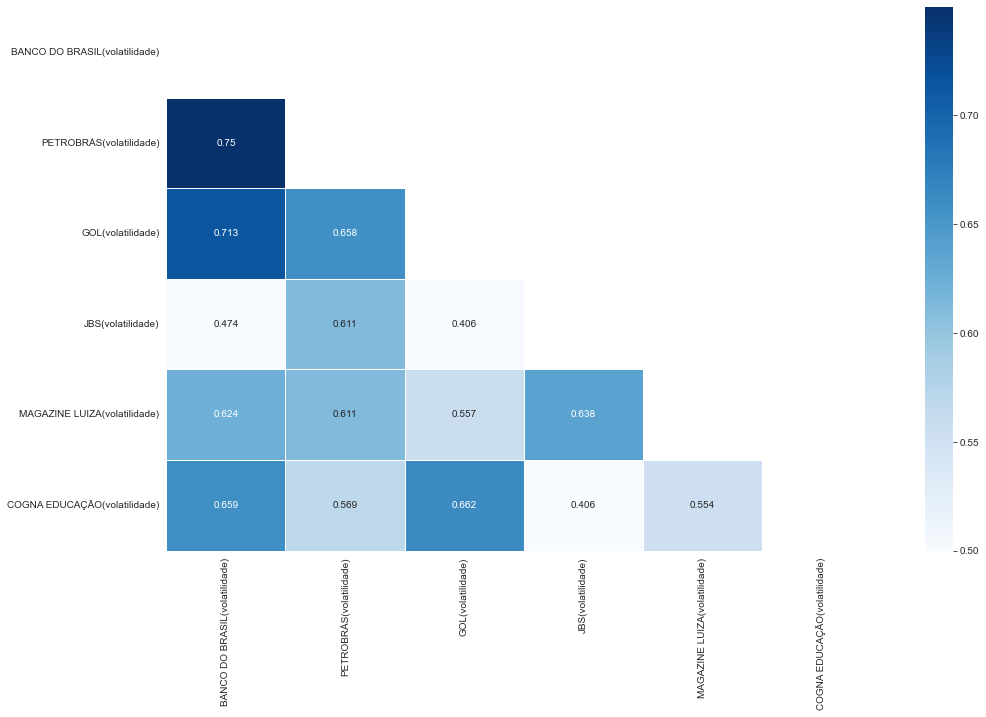

In [10]:
mask = np.zeros_like(volatilidade.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(volatilidade.corr(), annot=True, cmap='Blues', vmin=0.5, linewidths=1, fmt='.3g', mask=mask);
ax.figure.set_size_inches(16, 10)

<p>Com um gráfico de dispersão podemos observar as mesmas informações de maneira diferente, nos dando mais uma percepção sobre a mesma informação.

Uma maneira simples e eficiente de fazer isso é usando o pairplot do seaborn.</p>

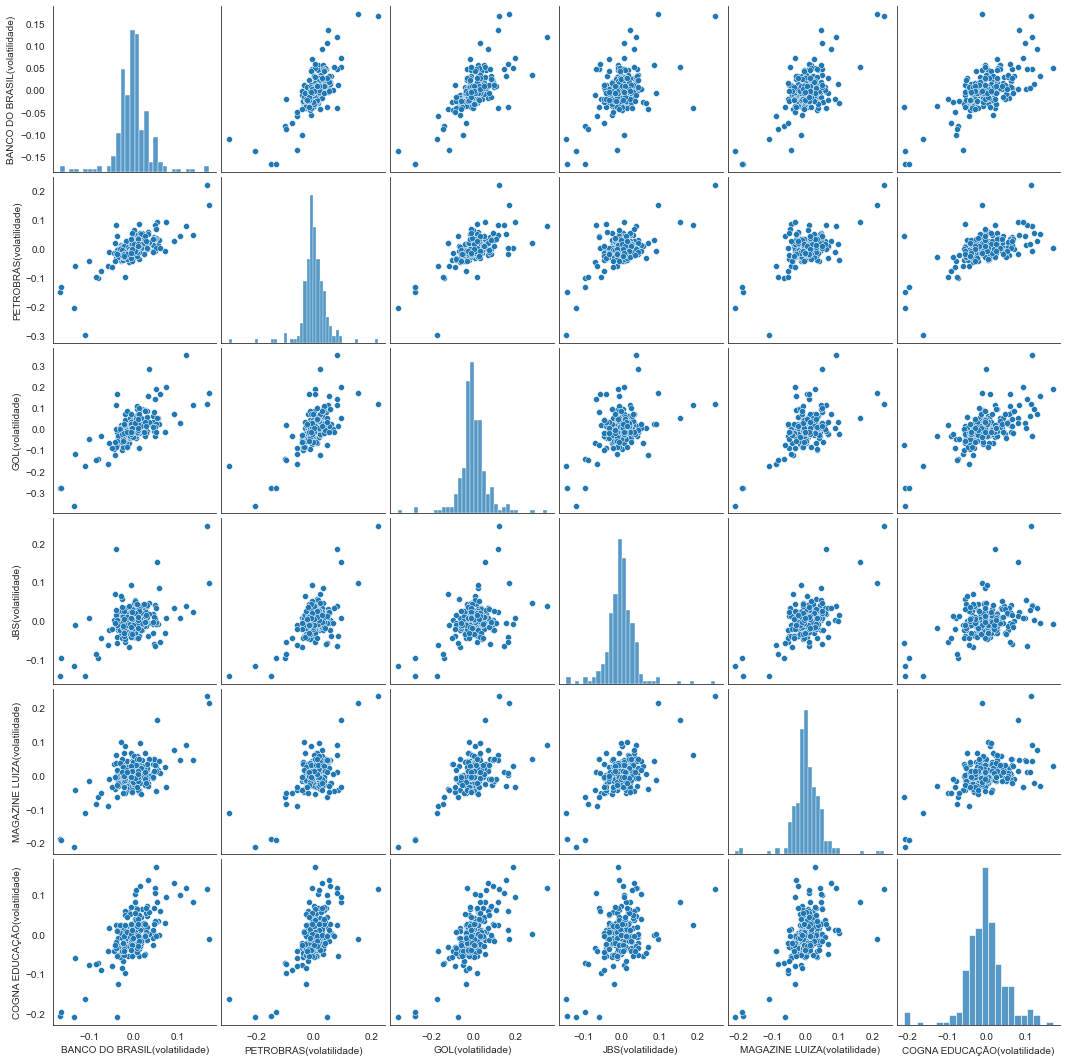

In [11]:
sns.pairplot(volatilidade);

<h2>Correlações</h2>

<p>O quão correlacionadas estão essas volatilidades? Elas se acompanham? Positivamente ou negativamente?

Os ativos no mercado costumam se comportar de maneira similar em casos de crise ou de boom. Isso porque a economia vai perdendo ou ganhando como um todo, o que por sua vez reflete o resultado no mercado financeiro.

Um guia para interpretar correlações:

Utilizaremos a correlação de Pearson nessa análise, ela se encaixa melhor com o objetivo do projeto.</p>
<ul>
<li>1.0 positivo ou negativo indica uma correlação perfeita
<li>0.9 positivo ou negativo indica uma correlação muito forte.
<li>:0.7 a 0.9 positivo ou negativo indica uma correlação forte.
<li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
<li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
<li>0.1 a 0.3 positivo ou negativo indica uma correlação desprezível.
<li>0 indica uma correlação inexistente
</ul>    

<h2>Correlação entre os preços</h2>

In [12]:
preço_ativos = pd.DataFrame()
for i in tickers:
  preço_ativos[i + '(preço)'] = ativos[i]['Close']
preço_ativos.corr()

,BANCO DO BRASIL(preço),PETROBRÁS(preço),GOL(preço),JBS(preço),MAGAZINE LUIZA(preço),COGNA EDUCAÇÃO(preço)
BANCO DO BRASIL(preço),1.000000,0.887970,0.945009,0.775379,-0.196915,0.932912
PETROBRÁS(preço),0.887970,1.000000,0.941937,0.791633,0.148816,0.821188
GOL(preço),0.945009,0.941937,1.000000,0.813699,0.023826,0.868054
JBS(preço),0.775379,0.791633,0.813699,1.000000,-0.174564,0.761036
MAGAZINE LUIZA(preço),-0.196915,0.148816,0.023826,-0.174564,1.000000,-0.271765
COGNA EDUCAÇÃO(preço),0.932912,0.821188,0.868054,0.761036,-0.271765,1.000000


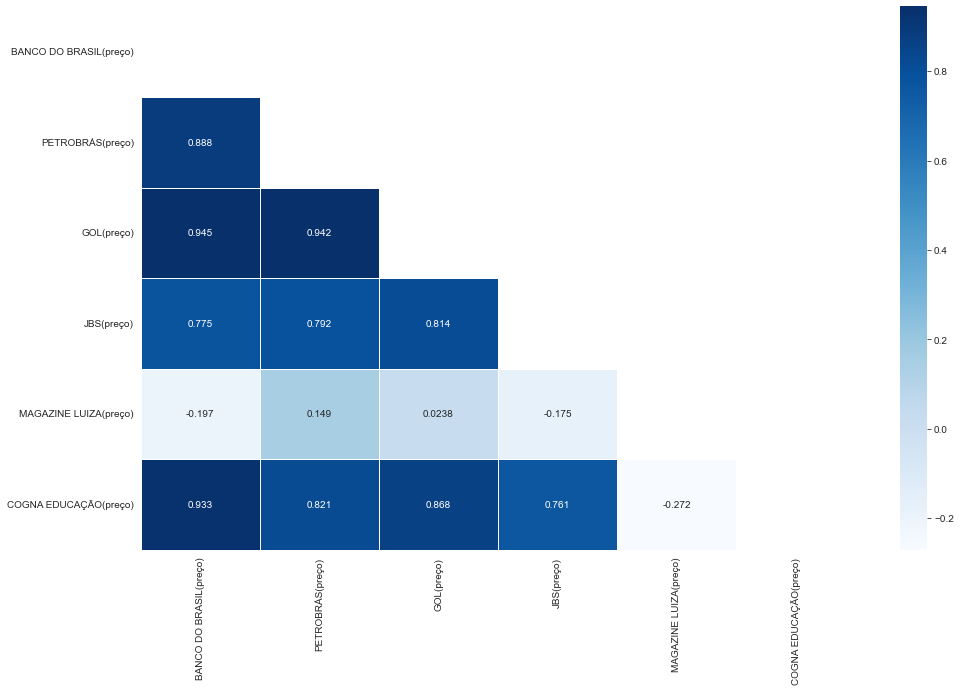

In [13]:
mask = np.zeros_like(preço_ativos.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(preço_ativos.corr(), annot=True, cmap='Blues', fmt='.3g', linewidths=1, mask = mask)
ax.figure.set_size_inches(16, 10)

<h4>Podemos observar aqui, uma correlação muito alta entre:</h4>
<ul>
    <li>BANCO DO BRASIL e COGNA EDUCAÇÃO (0.932)
    <li>BANCO DO BRASIL e GOL (0.945)
    <li>PETROBRÁS e GOL (0.942);
</ul>
    
<h4>Alta entre:</h4>
<ul>
    <li>BANCO DO BRASIL e PETROBRÁS (0.887)
    <li>BANCO DO BRASIL e JBS (0.777)
    <li>PETROBRÁS e COGNA EDUCAÇÃO (0.82)
    <li>PETROBRÁS e JBS (0.792)
    <li>GOL e JBS (0.814)
    <li>GOL e COGNA EDUCAÇÃO (0.867)
    <li>JBS e COGNA EDUCAÇÃO (0.762)
</ul>
    
<h4>Desprezível/inexistente entre:</h4>
<ul>
    <li>MAGAZINE LUIZA e BANCO DO BRASIL (-0,193)
    <li>MAGAZINE LUIZA e PETROBRÁS (0,154)
    <li>MAGAZINE LUIZA e JBS (0,028)
    <li>MAGAZINE LUIZA e GOL (-0,174)
    <li>MAGAZINE LUIZA e COGNA EDUCAÇÃO (-0,268)
</ul>    

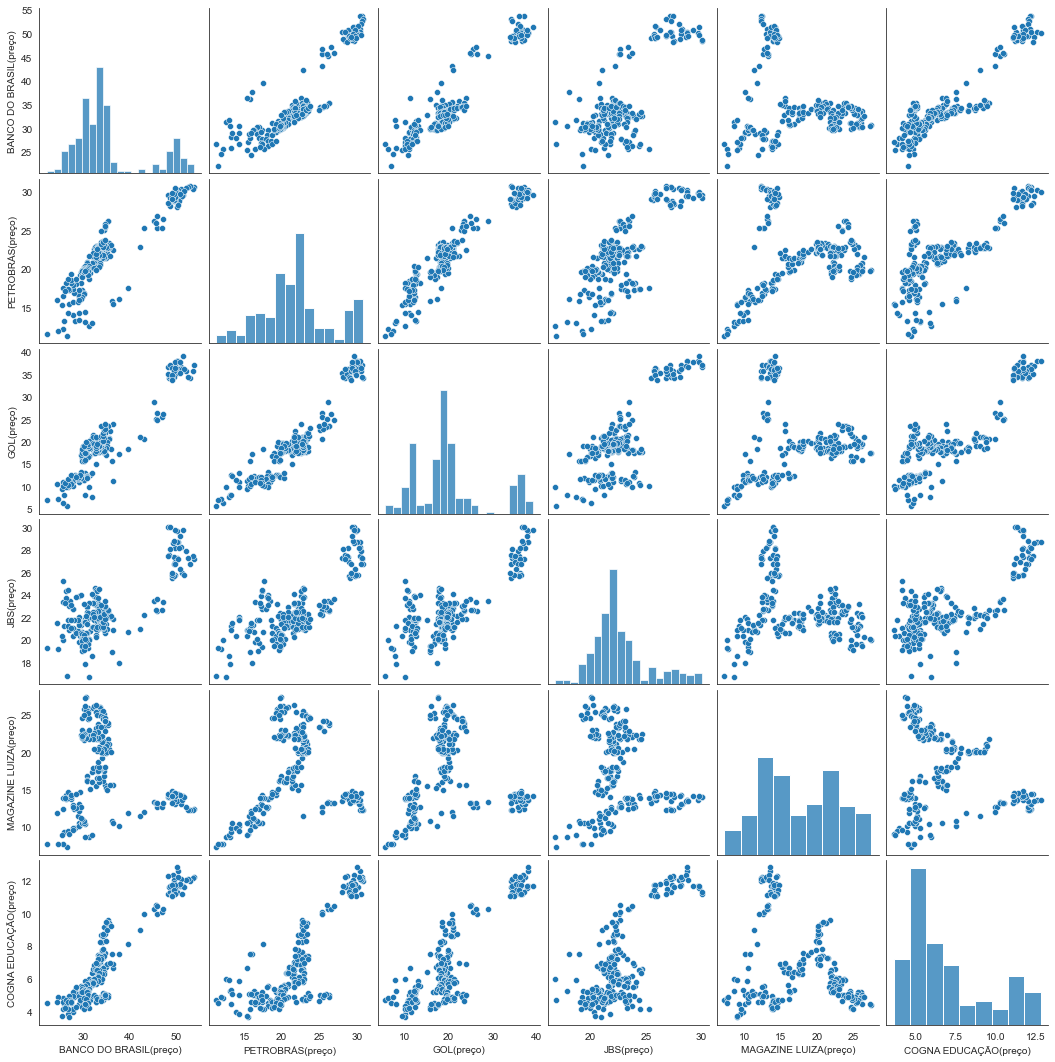

In [14]:
sns.pairplot(preço_ativos);


<h1>Análise do IBOVESPA</h1>

In [15]:
IBOVESPA = data.DataReader('^BVSP', 'yahoo', inicio, fim)
IBOVESPA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-25,110596,109315,109786,110133,8564700,110133
2020-11-26,110245,109418,110133,110227,6166800,110227
2020-11-27,111603,110161,110229,110575,8790300,110575


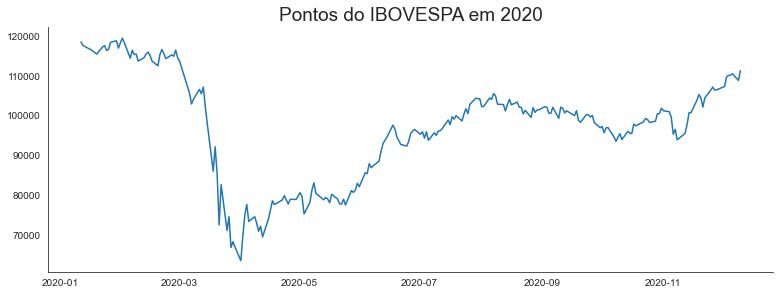

In [16]:
IBOVESPA['Close'].plot(figsize=(13,5))
plt.xticks(rotation=360)
sns.despine()
plt.title('Pontos do IBOVESPA em 2020',fontsize=19)
plt.xlabel('');

Uma queda acentuada é notada no mesmo período de queda dos ativos financeiros que analisamos anteriormente
A volatilidade do IBOVESPA

Text(0.5, 0, '')

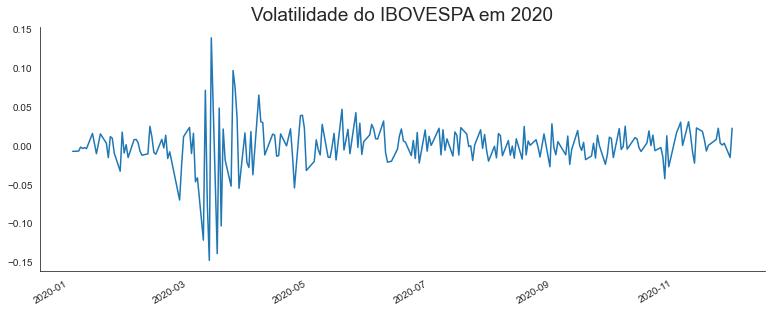

In [17]:
IBOVESPA_volat = IBOVESPA['Close'].pct_change()
IBOVESPA_volat.plot(figsize=(13,5))
sns.despine()
plt.title('Volatilidade do IBOVESPA em 2020',fontsize=19)
plt.xlabel('')

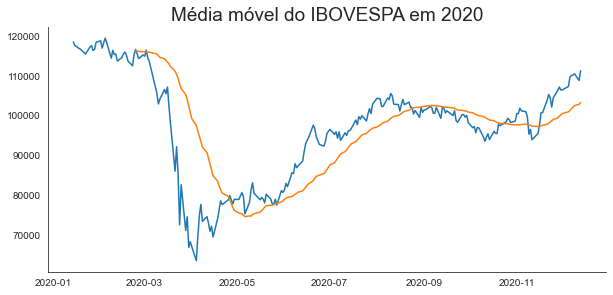

In [18]:
IBOVESPA['Close'].plot()
IBOVESPA['Close'].rolling(30).mean().plot(figsize=(10,5))
plt.xticks(rotation=360)
plt.xlabel('')
plt.title('Média móvel do IBOVESPA em 2020', fontsize=19)
sns.despine()

In [19]:
preço_corr = pd.DataFrame()
for i in tickers:
  preço_corr[i + 'corr'] = pd.Series(IBOVESPA['Close'].corr(ativos[i]['Close']))
preço_corr = preço_corr.dropna().T
preço_corr.columns = ['Correlação']
media = 0
for i in tickers:
  media += (IBOVESPA["Close"].corr(ativos[i]["Close"]))/len(tickers)
  desvio_padrao = preço_corr.std()
  print(f'Correlação do IBOVESPA COM {i}: {IBOVESPA["Close"].corr(ativos[i]["Close"]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão: {desvio_padrao}')

Correlação do IBOVESPA COM BANCO DO BRASIL: 0.810
Correlação do IBOVESPA COM PETROBRÁS: 0.948
Correlação do IBOVESPA COM GOL: 0.905
Correlação do IBOVESPA COM JBS: 0.671
Correlação do IBOVESPA COM MAGAZINE LUIZA: 0.389
Correlação do IBOVESPA COM COGNA EDUCAÇÃO: 0.732

Correlação média: 0.742
Desvio padrão: Correlação    0.201779
dtype: float64


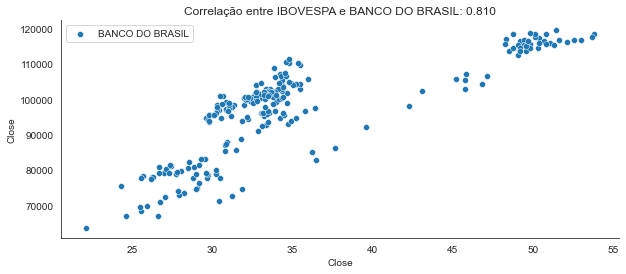

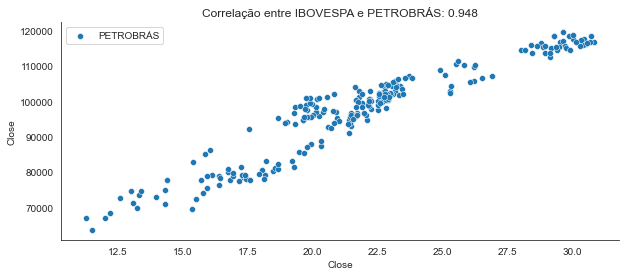

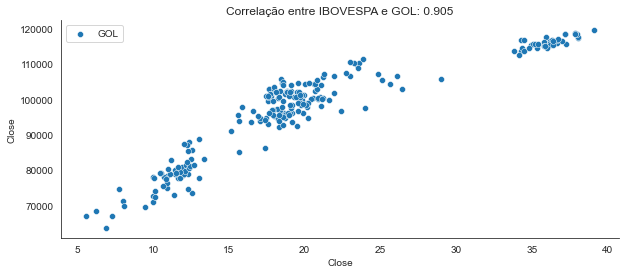

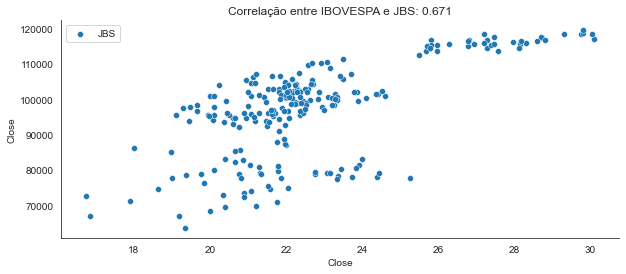

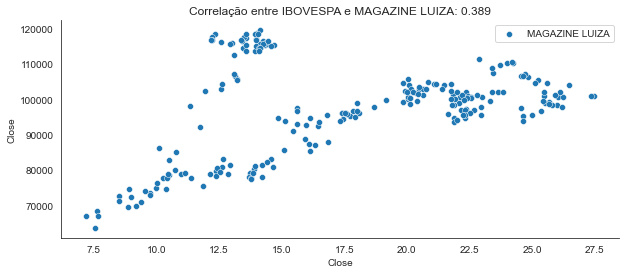

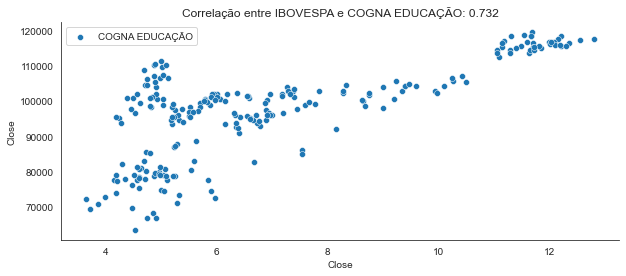

In [23]:
for i in tickers:
  labels = [i, 'IBOVESPA']
  plt.figure(figsize=(10,4))
  sns.scatterplot(x=ativos[i]['Close'], y=IBOVESPA['Close'])
  plt.legend(labels)
  sns.despine()
  plt.title(f'Correlação entre IBOVESPA e {i}: {IBOVESPA["Close"].corr(ativos[i]["Close"]):.3f}')
  plt.show()

In [21]:
volatilidade_corr = pd.DataFrame()
for i in volatilidade.columns:
  volatilidade_corr[i + 'corr'] = pd.Series(IBOVESPA_volat.corr(volatilidade[i]))
volatilidade_corr = volatilidade_corr.dropna().T
volatilidade_corr.columns = ['Correlação']
media = 0
for i in volatilidade.columns:
  media += (IBOVESPA_volat.corr(volatilidade[i])) /len(volatilidade.columns)
  desvio_padrao = volatilidade_corr.std()
  print(f'Correlação entre IBOVESPA e {i.strip("(volatilidade)")}: {IBOVESPA_volat.corr(volatilidade[i]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão da {desvio_padrao}')

Correlação entre IBOVESPA e BANCO DO BRASIL: 0.893
Correlação entre IBOVESPA e PETROBRÁS: 0.877
Correlação entre IBOVESPA e GOL: 0.755
Correlação entre IBOVESPA e JBS: 0.655
Correlação entre IBOVESPA e MAGAZINE LUIZA: 0.775
Correlação entre IBOVESPA e COGNA EDUCAÇÃO: 0.728

Correlação média: 0.781
Desvio padrão da Correlação    0.090865
dtype: float64


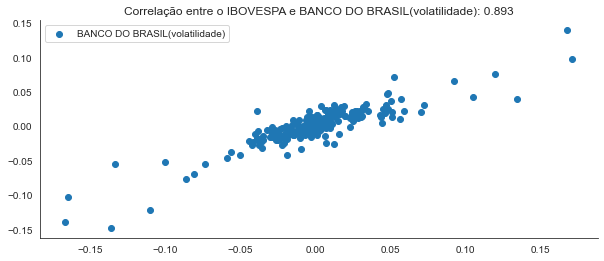

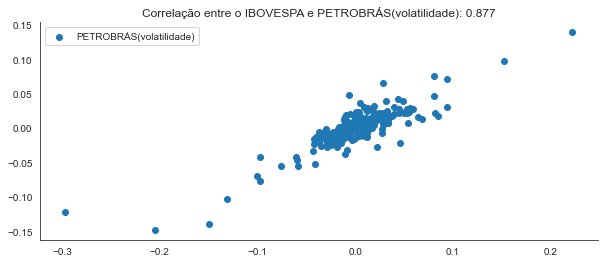

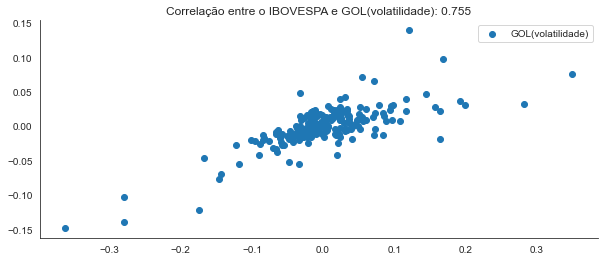

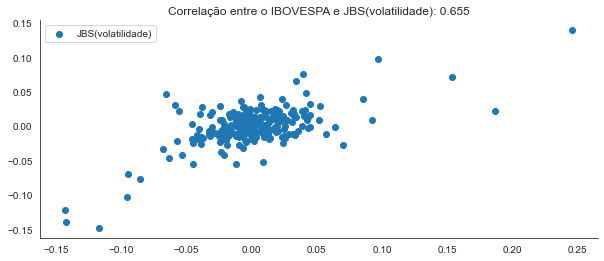

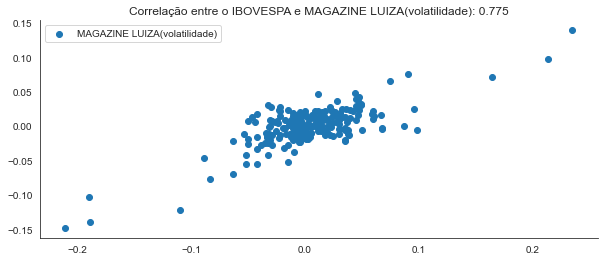

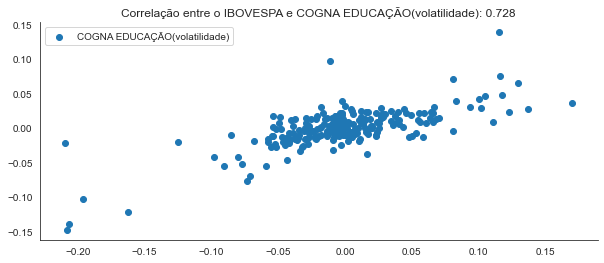

In [24]:
for i in volatilidade.columns:
  labels = [i, 'IBOVESPA']
  plt.figure(figsize=(10,4))
  plt.scatter(x=volatilidade[i], y=IBOVESPA_volat)
  plt.legend(labels)
  sns.despine()
  plt.title(f'Correlação entre o IBOVESPA e {i}: {IBOVESPA_volat.corr(volatilidade[i]):.3f}')
  plt.show()

<h1>Conclusão</h1>
<p>Baseado na análise desse projeto, podemos concluir o que já era sabido: a crise do coronavírus abalou o mercado financeiro, causou incerteza por um determinado período de tempo, mas desde então se acalmou. Olhando as métricas, podemos ver que a bolsa de valores acompanhou o preço e a volatilidade de alguns ativos, ambos caindo no mesmo período, o período de maior incerteza e desinformação. Estamos vivendo um momento ímpar, que veio devastando sistemas de saúde, vidas, famílias.</p>

<p>A educação parou, a vida de muita gente parou, empresas não resistiram, famílias se distanciaram. Uma análise sobre o mercado financeiro é muito pouco para buscar entender o que essa pandemia causou no Brasil e no mundo.</p>

<p>Agora com a vacina, estamos mais perto de controlar o contágio, e assim poderemos nos abraçar novamente, visitar parentes e amigos. E quando a estabilidade voltar, empresas ressurgirão, pais e filhos se encontrarão, mercados se reerguirão.</p>

<p>Abaixo, um gráfico de candlestick, que mostra a variação diária do preço no IBOVESPA</p>

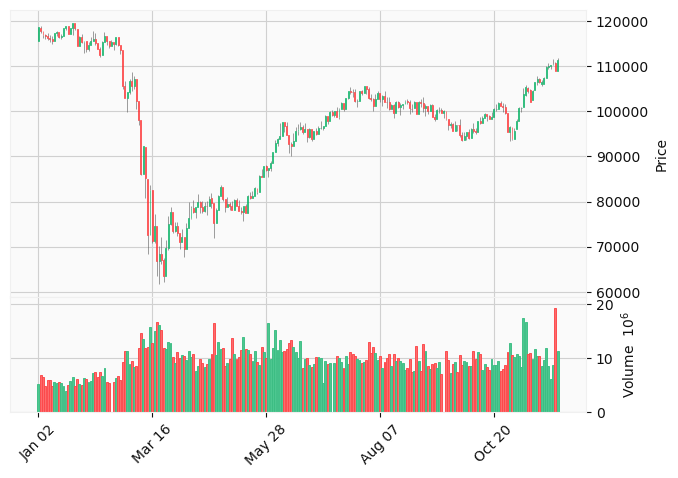

In [26]:
mpf.plot(IBOVESPA, type='candle', style='yahoo', volume=True, figscale=1.)